# Machine Learning 101

## Plan

* Introduction
* Supervised learning
    * Classification
    * Regression
* Unsupervised learning
    * Clustering
    * Dimensionality reduction
* Conclusion

## Introduction

* Programs that adapt their behavior to previously seen data
* Outcome is based on data quality, data quantity and model quality

## Supervised learning

### Classification - MNIT dataset

First we have to load the dataset.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print digits.data.shape

(1797, 64)


The digits are 8x8 arrays of floats from 0 to 1 representing the shade of grey of each pixel.

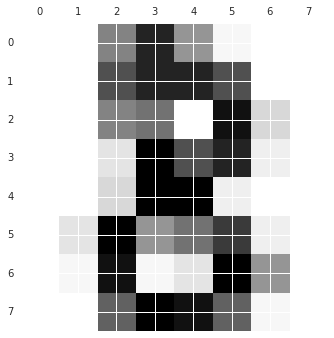

In [2]:
import pylab as pl
pl.matshow(digits.images[8])

We need to split the data into a test and a training datasets. This way we can test our model on different data than the data it was trained on. This is a mandatory step to avoid overfitting.

In [3]:
from sklearn.cross_validation import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(digits.data, digits.target, test_size=0.2)

Create a Gaussian Naive Bayes model, train it and test our accuracy predicting the test data.

In [4]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_data, train_labels)
score = gnb.score(test_data, test_labels)
print "Accuracy of our model : {0:.2f}%".format(score * 100)

Accuracy of our model : 86.11%


We can try to fit our model with 10% of the training data and we see that the accuracy is reduced.

In [5]:
gnb.fit(train_data[:len(train_data)/10], train_labels[:len(train_labels)/10])
score = gnb.score(test_data, test_labels)
print "Accuracy of our model : {0:.2f}%".format(score * 100)

Accuracy of our model : 74.72%


Let's plot our accuracy based on the number of training data point.

In [6]:
plot = {}
for x in range(1, len(train_data)):
  gnb.fit(train_data[:x], train_labels[:x])
  score = gnb.score(test_data, test_labels)
  plot[x] = score

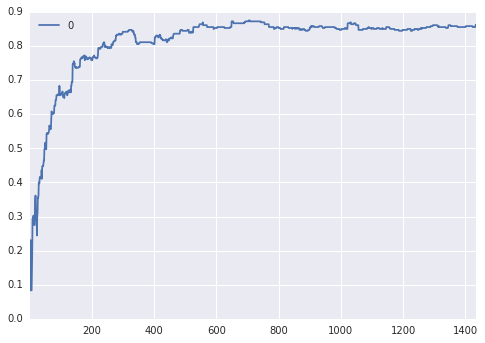

In [7]:
import pandas as pd
pd.DataFrame.from_dict(plot, orient='index').plot()

### Regression - Boston housing price dataset

In [8]:
from sklearn.datasets import load_boston
import numpy as np
boston_data = load_boston()
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston["PRICE"] = boston_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The boston housing price dataset contains 13 features (crime rate, number of rooms, age, etc..) and the target is the price of the house.

In [9]:
train_data, test_data, train_labels, test_labels = train_test_split(boston.drop('PRICE', axis=1), boston.PRICE, test_size=0.2)

Let's use a simple model and compute its accuracy.

In [10]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(normalize=True)
lm.fit(train_data, train_labels)
score = lm.score(test_data, test_labels)
print "Accuracy of our model : {0:.2f}%".format(score * 100)

Accuracy of our model : 71.78%


In [11]:
def plot_regression(column, color='r'):
  lm = LinearRegression(normalize=True)
  lm.fit(train_data[[column]], train_labels)
  pl.scatter(test_data[[column]], test_labels, color=color)
  pl.plot(test_data[[column]], lm.predict(test_data[[column]]), color=color, label=column)

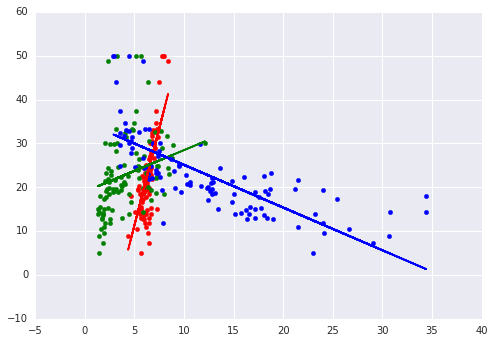

In [12]:
plot_regression('RM', 'r')
plot_regression('DIS', 'g')
plot_regression('LSTAT', 'b')

Let's try to improve the accuracy of our model. We can use GridSearchCV to try many parameters used in our model and keep only the best.

In [43]:
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameters = {'min_samples_split': [1, 2, 4], 'min_samples_leaf': [1, 2, 4, 8, 16], 'max_features': range(8, 13)}
dtr = DecisionTreeRegressor(random_state=23)
gcv = GridSearchCV(dtr, parameters)
gcv.fit(train_data, train_labels)
score = gcv.score(test_data, test_labels)
print "Best parameters : %s" % (gcv.best_params_)
print "Accuracy of our model : {0:.2f}%".format(score * 100)

Best parameters : {'max_features': 9, 'min_samples_split': 1, 'min_samples_leaf': 4}
Accuracy of our model : 84.35%


## Unsupervised Learning 